Importing the Libraries


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

Importing the CSV file


In [2]:
df = pd.read_csv('pulsar_data_train.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


Checking out for missing values, DataTypes etc from the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [4]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [5]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [6]:
x = df.iloc[:,0:8].values
y = df.iloc[:,-1].values
print(x)
print(y)

[[ 1.21156250e+02  4.83729711e+01  3.75484665e-01 ...  1.83993666e+01
   7.44987415e+00  6.51592977e+01]
 [ 7.69687500e+01  3.61755566e+01  7.12897860e-01 ...  1.75709969e+01
   9.41465226e+00  1.02722975e+02]
 [ 1.30585938e+02  5.32295335e+01  1.33408289e-01 ...  2.23625530e+01
   8.50836378e+00  7.40313242e+01]
 ...
 [ 1.16031250e+02  4.32138464e+01  6.63455691e-01 ...  1.16281494e+01
   1.70552145e+01  3.12204325e+02]
 [ 1.35664062e+02  4.99337494e+01 -8.99403060e-02 ...  2.15015050e+01
   7.39839490e+00  6.23340175e+01]
 [ 1.20726562e+02  5.04722564e+01  3.46178079e-01 ...  1.17926025e+01
   1.76622219e+01  3.29548016e+02]]
[0. 0. 0. ... 0. 0. 0.]


Operating on the Missing Values of data


In [7]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(x[:,0:8])
x[:,0:8] = imputer.transform(x[:,0:8])
x[:,0:8]

array([[ 1.21156250e+02,  4.83729711e+01,  3.75484665e-01, ...,
         1.83993666e+01,  7.44987415e+00,  6.51592977e+01],
       [ 7.69687500e+01,  3.61755566e+01,  7.12897860e-01, ...,
         1.75709969e+01,  9.41465226e+00,  1.02722975e+02],
       [ 1.30585938e+02,  5.32295335e+01,  1.33408289e-01, ...,
         2.23625530e+01,  8.50836378e+00,  7.40313242e+01],
       ...,
       [ 1.16031250e+02,  4.32138464e+01,  6.63455691e-01, ...,
         1.16281494e+01,  1.70552145e+01,  3.12204325e+02],
       [ 1.35664062e+02,  4.99337494e+01, -8.99403060e-02, ...,
         2.15015050e+01,  7.39839490e+00,  6.23340175e+01],
       [ 1.20726562e+02,  5.04722564e+01,  3.46178079e-01, ...,
         1.17926025e+01,  1.76622219e+01,  3.29548016e+02]])

In [8]:
df.isnull().sum() #Now we have no missing values

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

Splitting the Dataset into Training Set and Test Set

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)


[[ 1.24601562e+02  5.67984842e+01 -1.00080445e-01 ...  1.76487712e+01
   1.01304706e+01  1.11697342e+02]
 [ 1.07375000e+02  4.86381730e+01  2.18811901e-01 ...  2.21020499e+01
   9.17302993e+00  8.51330343e+01]
 [ 8.29609375e+01  3.62136461e+01  7.43457277e-01 ...  1.24546718e+01
   1.22392783e+01  1.88518602e+02]
 ...
 [ 7.84218750e+01  3.30817192e+01  2.05681164e+00 ...  1.97352670e+01
   1.06547546e+01  1.16145304e+02]
 [ 1.26406250e+02  4.92635510e+01 -5.31769490e-02 ...  2.36088441e+01
   6.97306518e+00  5.21720817e+01]
 [ 1.08109375e+02  5.53655797e+01  1.83769640e-01 ...  2.90941814e+01
   5.86070929e+00  3.81944075e+01]]
[[ 1.16828125e+02  5.06683625e+01  7.77529390e-02 ...  9.86602499e+00
   1.74286459e+01  3.90291581e+02]
 [ 1.23937500e+02  4.62562073e+01  2.33668745e-01 ...  2.77142958e+01
   5.11567785e+00  2.74753175e+01]
 [ 1.46335938e+02  6.87449177e+01  4.78547749e-01 ...  8.31691296e+01
  -6.08066993e-01  1.05525779e+02]
 ...
 [ 1.34468750e+02  5.33114284e+01  1.8997128

Feature Scaling

In [10]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)

[[ 0.52769526  1.51430917 -0.58688847 ... -0.46541636  0.39775244
   0.06091633]
 [-0.13990368  0.31368487 -0.26425542 ... -0.22768078  0.18602849
  -0.19557446]
 [-1.08604732 -1.51433229  0.26654419 ... -0.7427002   0.8640843
   0.80266144]
 ...
 [-1.26195434 -1.97513181  1.59530457 ... -0.35403005  0.51369015
   0.10386348]
 [ 0.5976342   0.40569656 -0.53943478 ... -0.14724149 -0.30046142
  -0.51382783]
 [-0.11144368  1.30348632 -0.29970874 ...  0.14558991 -0.5464426
  -0.6487888 ]]
[[ 2.26443129e-01  6.12386080e-01 -4.06969047e-01 ... -8.80893531e-01
   2.01163676e+00  2.75087370e+00]
 [ 5.01960154e-01 -3.67730695e-02 -2.49224305e-01 ...  7.19255558e-02
  -7.11195362e-01 -7.52286615e-01]
 [ 1.36999017e+00  3.27198457e+00 -1.47280034e-03 ...  3.03234815e+00
  -1.97691751e+00  1.32700988e-03]
 ...
 [ 9.10088670e-01  1.00125962e+00 -4.66414080e-01 ... -5.32970769e-01
   4.66962279e-01  1.09095408e-01]
 [-2.51624325e-01 -4.16476005e-01  1.54416314e-01 ... -7.22304493e-01
   1.37789429e+

Data Visualization


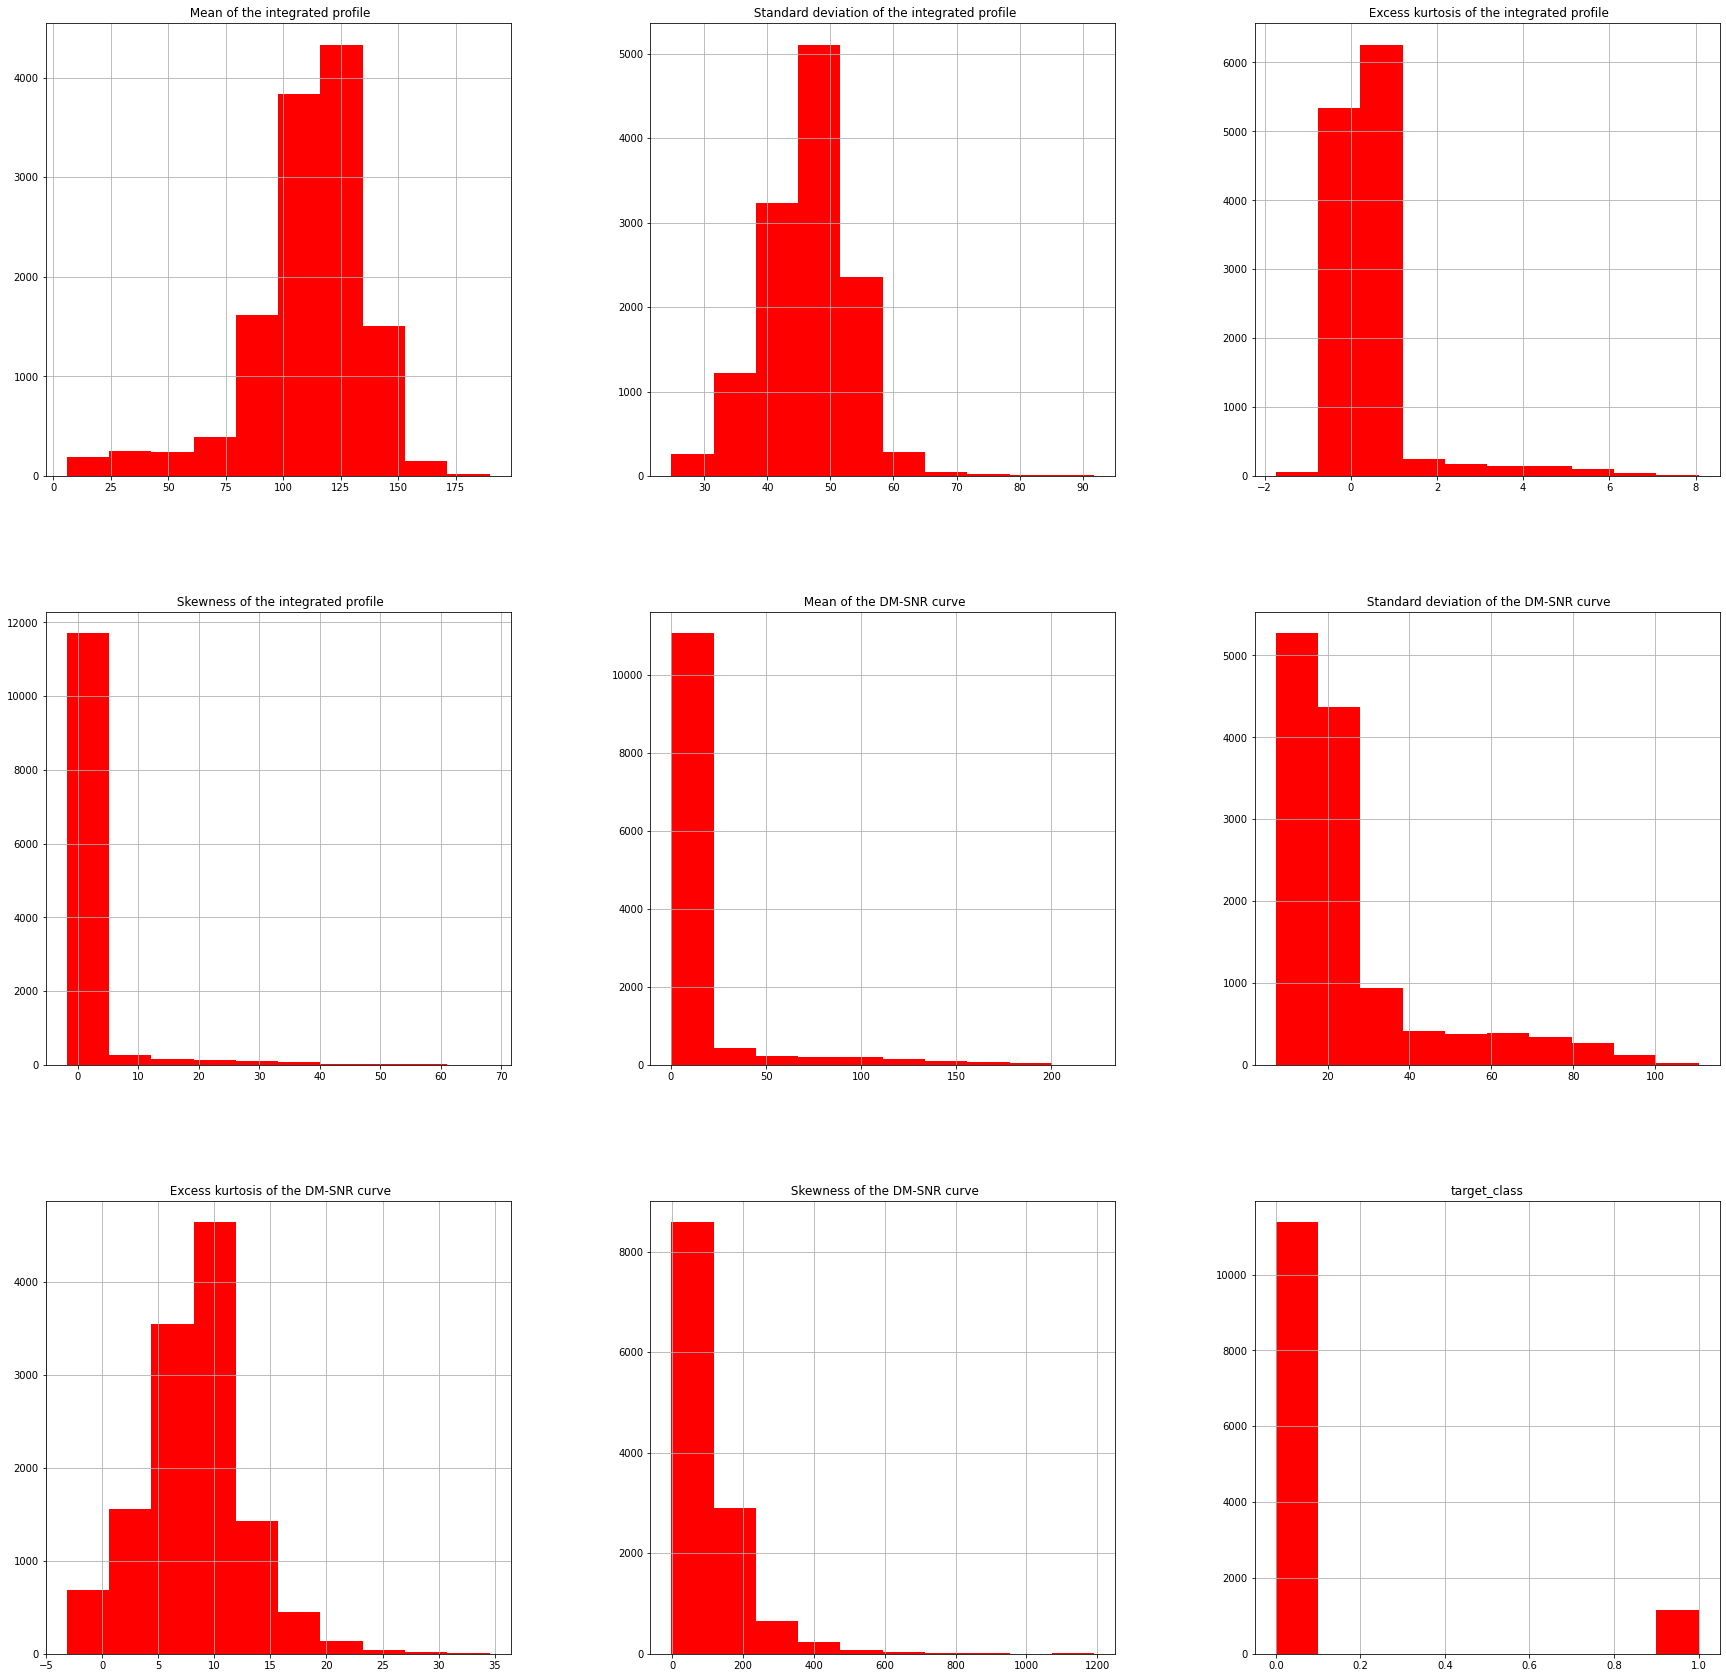

In [11]:
df.hist(bins = 10, figsize = (30,30), color='red')
plt.show()

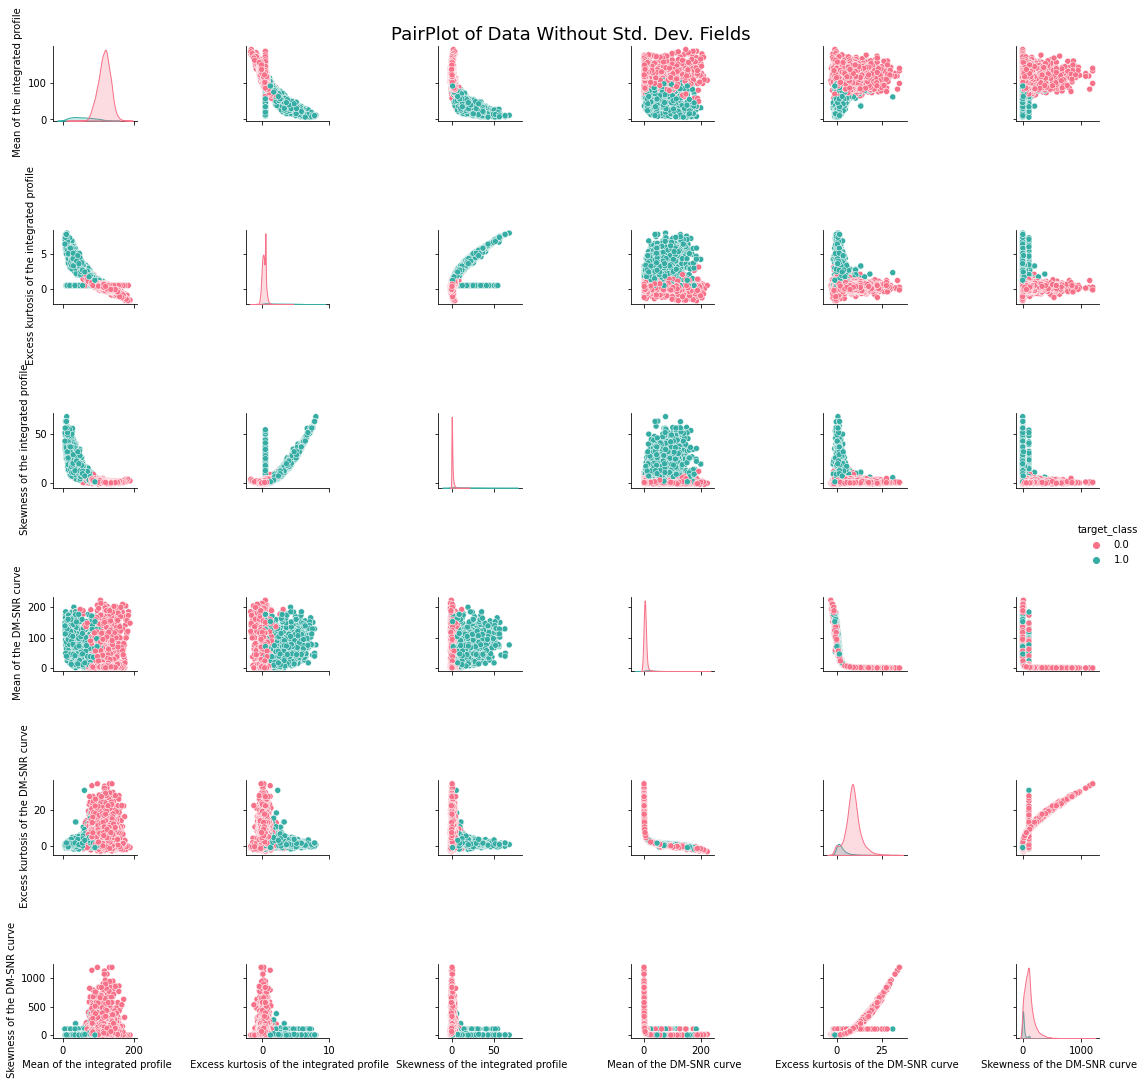

In [12]:
sns.pairplot(data=df,
             palette="husl",
             hue="target_class",
             vars=[" Mean of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve"])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show() 

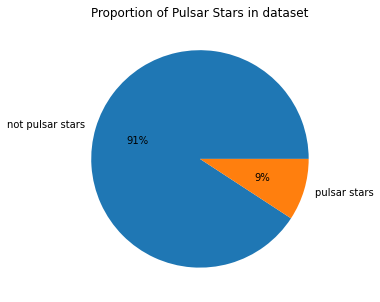

There are 1153 signals that belong to pulsar stars and 11375 signals that aren't from pulsars.


In [13]:
pulsar_count =  df["target_class"].value_counts()[1]
not_pulsar_count = df["target_class"].value_counts()[0]
plt.figure(figsize=(5,5))
plt.pie(df["target_class"].value_counts().values,labels=["not pulsar stars","pulsar stars"], autopct="%1.0f%%")
plt.title("Proportion of Pulsar Stars in dataset")
plt.show()
print("There are " + str(pulsar_count) + " signals that belong to pulsar stars " 
      + "and " + str(not_pulsar_count) + " signals that aren't from pulsars.")

Building the Artifical Neural Network

In [14]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 8,activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 8,activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))

Training the Artifical Neural Network

In [15]:
ann.compile(optimizer = 'sgd', loss = 'binary_crossentropy',metrics = ['accuracy'])
ann.fit(x_train,y_train,batch_size = 32,epochs = 100)

Epoch 1/100
294/294 [==============================] - 1s 1ms/step - loss: 0.4797 - accuracy: 0.8868
Epoch 2/100
294/294 [==============================] - 0s 1ms/step - loss: 0.2396 - accuracy: 0.9606
Epoch 3/100
294/294 [==============================] - 0s 1ms/step - loss: 0.1573 - accuracy: 0.9648
Epoch 4/100
294/294 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.9679
Epoch 5/100
294/294 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.9687
Epoch 6/100
294/294 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.9695
Epoch 7/100
294/294 [==============================] - 0s 1ms/step - loss: 0.1057 - accuracy: 0.9697
Epoch 8/100
294/294 [==============================] - 0s 1ms/step - loss: 0.1028 - accuracy: 0.9704
Epoch 9/100
294/294 [==============================] - 0s 1ms/step - loss: 0.1005 - accuracy: 0.9707
Epoch 10/100
294/294 [==============================] - 0s 1ms/step - loss: 0.0987 - accura

Prediciting the Test Set results

In [16]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Building the Confusion Matrix

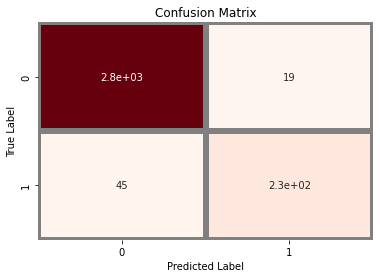

In [17]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf,annot=True,cbar=False,linewidths=5,linecolor='Grey',cmap = 'Reds')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

Finding the Accuracy and Classifiction report of our Model

In [18]:
accuracy_score(y_test,y_pred)

0.979565772669221

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2854
         1.0       0.92      0.84      0.88       278

    accuracy                           0.98      3132
   macro avg       0.95      0.92      0.93      3132
weighted avg       0.98      0.98      0.98      3132

